# Team- PySpyder


In [437]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore',category=Warning)

# reading the Hackthon_case_training_data.csv file into dataset named ds
ds = pd.read_csv("C:\\Users\\ABDUL MUGEESH\\Desktop\\Hack\\Hackthon_case_training_data.csv")

# Identifying Variables which are irrelevant and removing them from dataset
columns=['campaign_disc_ele','date_activ','date_end','date_first_activ','date_modif_prod','date_renewal']
ds=ds.drop(columns,axis=1)

# reading the Hackthon_case_training_output.csv file into dataset named ds_res
ds_res = pd.read_csv("C:\\Users\\ABDUL MUGEESH\\Desktop\\Hack\\Hackthon_case_training_output.csv")


# Making Imputer Class for all dtype nan values filling

from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
# Making X as DataFrame of Dataset ds
X = pd.DataFrame(ds)

# Imputing nan Values and storing into DataFrame ds1
ds1 = DataFrameImputer().fit_transform(X)



# Identifying varibles which has Hashed or String or Boolean values for Label Encoding
x=['activity_new','channel_sales','origin_up','has_gas']

#Label Encoding
for i in x:
    le = LabelEncoder();
    ds1[i] = le.fit_transform(ds1[i].astype(str))

# ds_training_data now contains processed data    
ds_training_data=ds1

#######################################################



# Reading Hackathon_case_training_hist_data.csv into ds_his1
ds_his1 = pd.read_csv("C:\\Users\\ABDUL MUGEESH\\Desktop\\Hack\\Hackathon_case_training_hist_data.csv")

# Removing a variable which is irrelevant to prediction.
ds_his=ds_his1.drop('price_date',axis=1)

#Label Encoding the Historical Dataset
ds_his= DataFrameImputer().fit_transform(ds_his)

#######################################################
#Grouping the historical data of 12 months into 1 month with function as mean
ds_his=ds_his.groupby(['id']).mean().reset_index()

#Merging Training and Historical Datasets
ds_his_ds_train=ds_his.merge(ds_training_data, on='id')

#######################################################

# Seperating the Historical data of 596 customer into df3 from 16096 for whom prediction to be made.
df3=pd.concat([ds_his_ds_train,ds_res]).loc[ds_his_ds_train.index.symmetric_difference(ds_res.index)]



####################################################

# Merging output data with Training_and_Historical data into final processed Dataset
ds_his_train_out=ds_his_ds_train.merge(ds_res, on = 'id')

df3.head()

,activity_new,channel_sales,churn,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,...,net_margin,num_years_antig,origin_up,pow_max,price_p1_fix,price_p1_var,price_p2_fix,price_p2_var,price_p3_fix,price_p3_var
15500,182.0,3.0,NaN,19290.0,0.0,2164.0,335.843857,335.843857,3837.441866,206.845165,...,195.30,4.0,3.0,17.320,40.633851,0.120410,24.380309,0.099869,16.253540,0.070461
15501,17.0,3.0,NaN,31704.0,0.0,4694.0,335.843857,335.843857,3837.441866,206.845165,...,166.07,7.0,2.0,10.350,44.400265,0.143991,0.000000,0.000000,0.000000,0.000000
15502,17.0,3.0,NaN,1435.0,12654.0,0.0,335.843857,335.843857,3837.441866,206.845165,...,14.26,5.0,1.0,10.350,44.992857,0.167972,0.000000,0.000000,0.000000,0.000000
15503,17.0,3.0,NaN,5770.0,0.0,527.0,335.843857,335.843857,3837.441866,206.845165,...,89.08,5.0,3.0,15.000,44.188482,0.150003,0.891517,0.004534,0.537953,0.002559
15504,17.0,3.0,NaN,2711.0,0.0,0.0,335.843857,335.843857,3837.441866,206.845165,...,42.48,6.0,1.0,10.392,44.266930,0.150643,0.000000,0.000000,0.000000,0.000000


In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)

#Copying processed Dataset into kc and corr_kc for lasso Regression and Correlation respectively.
kc=ds_his_train_out
corr_kc=kc
print(kc.head())
print(kc.shape)
print(kc.dtypes)
kc.head()

                                 id  price_p1_var  price_p2_var  price_p3_var  \
0  0002203ffbb812588b632b9e628cc38d      0.124338      0.103794      0.073160   
1  0010bcc39e42b3c2131ed2ce55246e3c      0.181558      0.000000      0.000000   
2  0010ee3855fdea87602a5b7aba8e42de      0.118757      0.098292      0.069032   
3  00114d74e963e47177db89bc70108537      0.147926      0.000000      0.000000   
4  00126c87cf78d7604278f0a9adeb689e      0.119806      0.099417      0.070304   

   price_p1_fix  price_p2_fix  price_p3_fix  activity_new  channel_sales  \
0     40.701732     24.421038     16.280694            17              3   
1     45.319710      0.000000      0.000000           151              6   
2     40.647427     24.388455     16.258971            17              4   
3     44.266930      0.000000      0.000000           338              1   
4     40.661003     24.396601     16.264402           220              3   

   cons_12m  ...    has_gas  imp_cons  margin_gross_pow_

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,activity_new,channel_sales,cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,17,3,22034,...,0,40.78,43.08,43.08,1,81.42,6,1,17.250,0
1,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,151,6,7440,...,0,213.76,38.58,38.58,2,81.61,3,3,13.856,0
2,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,17,4,4199490,...,1,1533.07,-2.80,-2.80,2,897.08,6,1,33.000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,338,1,11272,...,0,0.00,29.76,29.76,1,157.99,6,1,13.200,0
4,00126c87cf78d7604278f0a9adeb689e,0.119806,0.099417,0.070304,40.661003,24.396601,16.264402,220,3,104657,...,0,642.89,-4.41,-4.41,1,700.71,4,3,70.000,0


In [439]:

# Removing id column for Lasso to weigh right variables
kc= kc.drop(['id'],axis=1)
kc.head()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,activity_new,channel_sales,cons_12m,cons_gas_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,17,3,22034,0,...,0,40.78,43.08,43.08,1,81.42,6,1,17.250,0
1,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,151,6,7440,0,...,0,213.76,38.58,38.58,2,81.61,3,3,13.856,0
2,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,17,4,4199490,728810,...,1,1533.07,-2.80,-2.80,2,897.08,6,1,33.000,0
3,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,338,1,11272,0,...,0,0.00,29.76,29.76,1,157.99,6,1,13.200,0
4,0.119806,0.099417,0.070304,40.661003,24.396601,16.264402,220,3,104657,0,...,0,642.89,-4.41,-4.41,1,700.71,4,3,70.000,0


In [440]:
# Result upon which training and testing to be performed.
y = kc.churn.values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [441]:
kc1=kc
#Dropping Churn from kc dataset
kc= kc.drop(['churn'], axis=1)
kc.head()


,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,activity_new,channel_sales,cons_12m,cons_gas_12m,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,17,3,22034,0,...,40.606701,0,40.78,43.08,43.08,1,81.42,6,1,17.250
1,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,151,6,7440,0,...,45.806878,0,213.76,38.58,38.58,2,81.61,3,3,13.856
2,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,17,4,4199490,728810,...,40.606701,1,1533.07,-2.80,-2.80,2,897.08,6,1,33.000
3,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,338,1,11272,0,...,44.311378,0,0.00,29.76,29.76,1,157.99,6,1,13.200
4,0.119806,0.099417,0.070304,40.661003,24.396601,16.264402,220,3,104657,0,...,40.606701,0,642.89,-4.41,-4.41,1,700.71,4,3,70.000


In [442]:
# Converting kc dataset to matrix for regression and checking variabes
X= kc.as_matrix()
colnames=kc.columns
print(colnames)
print(len(colnames))


Index(['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix',
       'price_p2_fix', 'price_p3_fix', 'activity_new', 'channel_sales',
       'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_base_bill_ele',
       'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max'],
      dtype='object')
31


In [443]:
# create a lasso regressor
lasso = Lasso(alpha=.1, normalize=False)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.41932019e-05 -0.00000000e+00
 -2.03231260e-08 -3.80289724e-08  2.36190267e-08  0.00000000e+00
  0.00000000e+00 -1.21343910e-07 -1.40032899e-05 -1.25580714e-06
  1.95736988e-08 -0.00000000e+00  8.78446046e-05 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  8.30504022e-04  3.00460859e-05 -0.00000000e+00  3.95986109e-05
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00]


In [444]:
# Making a dictionary having key as variable and corresponding value as weightage in prediction of churn as coefficient Dictionary
 
coef_dict=dict(zip(colnames,lasso_coef))
print(coef_dict)


# Separating Variables which are having positive weights. 
new_dict = {key:val for key , val in coef_dict.items() if val > 0}

#making list of Explicative variables
dict_list = [key for key,val in new_dict.items()]




#Making list of less or no contribution variables for removing from dataset for best results
new_dictn = {key:val for key , val in coef_dict.items() if val <=0}
dict_listn = [key for key,val in new_dictn.items()]

print("\n")
print("Variables with zero or Negative weightage:")
print(dict_listn)
print("\n")
# Most Explicative variables
print("Variables with positive weightage, the most explicative variables:")
print(dict_list)


{'price_p1_var': 0.0, 'price_p2_var': 0.0, 'price_p3_var': 0.0, 'price_p1_fix': 0.0, 'price_p2_fix': 0.0, 'price_p3_fix': 0.0, 'activity_new': 3.419320187030971e-05, 'channel_sales': -0.0, 'cons_12m': -2.0323125971081905e-08, 'cons_gas_12m': -3.8028972376388024e-08, 'cons_last_month': 2.3619026660795975e-08, 'forecast_base_bill_ele': 0.0, 'forecast_base_bill_year': 0.0, 'forecast_bill_12m': -1.2134391008009482e-07, 'forecast_cons': -1.400328992055165e-05, 'forecast_cons_12m': -1.2558071376178678e-06, 'forecast_cons_year': 1.957369877585236e-08, 'forecast_discount_energy': -0.0, 'forecast_meter_rent_12m': 8.784460460603523e-05, 'forecast_price_energy_p1': -0.0, 'forecast_price_energy_p2': 0.0, 'forecast_price_pow_p1': 0.0, 'has_gas': -0.0, 'imp_cons': 0.0, 'margin_gross_pow_ele': 0.0008305040215883649, 'margin_net_pow_ele': 3.00460859095744e-05, 'nb_prod_act': -0.0, 'net_margin': 3.95986108565192e-05, 'num_years_antig': -0.0, 'origin_up': 0.0, 'pow_max': -0.0}


Variables with zero or N

In [445]:
# Removing negative or zero weight variables from dataset
for  i in dict_listn:
    kc1=kc1.drop([i],axis=1)
X1=kc1.as_matrix()  

kc1.shape

      

(15500, 8)

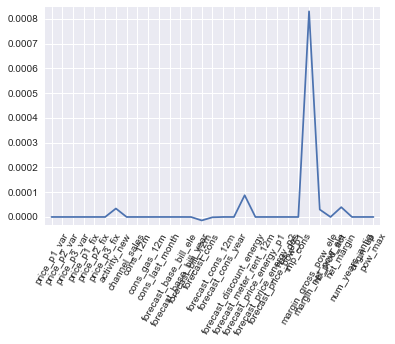

In [446]:
# Vizualising weightage through graph.
plt.plot(range(len(colnames)), lasso_coef)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)

plt.show()

In [447]:
kc1.head()

,activity_new,cons_last_month,forecast_cons_year,forecast_meter_rent_12m,margin_gross_pow_ele,margin_net_pow_ele,net_margin,churn
0,17,3084,425,138.95,43.08,43.08,81.42,0
1,151,1062,1062,18.37,38.58,38.58,81.61,0
2,17,456462,17393,132.11,-2.80,-2.80,897.08,0
3,338,0,0,18.27,29.76,29.76,157.99,0
4,220,6760,6760,393.44,-4.41,-4.41,700.71,0


In [457]:
# Processing the data of 596 customers for prediction

df_toresult=df3
import pandas as pd

# Removing negative and zero weigh variables

for  i in dict_listn:
    df_toresult=df_toresult.drop([i],axis=1)
id_list=df_toresult.id.values    
df_toresultx=df_toresult.drop(['id'],axis=1)    
df_toresultx1=df_toresultx.drop(['churn'],axis=1)  
# Making as Matrix and storing to df_toresult1
df_toresult1=df_toresultx1.as_matrix()

df_toresultx1.head()

,activity_new,cons_last_month,forecast_cons_year,forecast_meter_rent_12m,margin_gross_pow_ele,margin_net_pow_ele,net_margin
15500,182.0,2164.0,2164.0,131.02,13.32,13.32,195.30
15501,17.0,4694.0,2029.0,16.74,21.23,21.23,166.07
15502,17.0,0.0,0.0,6.82,27.78,27.78,14.26
15503,17.0,527.0,527.0,14.20,24.78,24.78,89.08
15504,17.0,0.0,0.0,16.44,26.04,26.04,42.48


In [449]:
# Creating Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
kcnn=kc1

#Dropping churn from dataset
kcnn=kcnn.drop(['churn'],axis=1)

x_kn=kcnn.as_matrix()
y=kc1.churn.values

# Splitting Data Matrix into Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(x_kn, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.8815483870967742

In [458]:
# Predicting result for 596 customers
ch_res=knn.predict(df_toresultx1)
print(ch_res)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 

In [460]:
# Finding probability factors for each customer 

prob=knn.predict_proba(df_toresultx1)
prob_lis=[]
for i in range(0,596):
    prob_lis.append(prob[i][1])
print(prob_lis)    

[0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.3333333333333333,

In [461]:
# creating odd list of K for KNN
from sklearn.model_selection import cross_val_score
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print(cv_scores)

[0.8352671481161178, 0.8812049465977327, 0.895311370838404, 0.8975480050246561, 0.8995265376485356, 0.9005592398860573, 0.9008177111791827, 0.9004734031030013, 0.900989458488017, 0.9007313569256441, 0.9009033999682237, 0.9009033999682237, 0.9009033999682237, 0.9009033999682237, 0.9009033999682237, 0.9009033999682237, 0.9009033999682237, 0.9009033999682237, 0.9009033999682237, 0.9009033999682237, 0.9009033999682237, 0.9009033999682237, 0.9009033999682237, 0.9009033999682237, 0.9009033999682237]


In [369]:
# Making .csv file of id,probability and churn.

import csv

with open('sample_output_res.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(id_list,prob_lis,ch_res))

# Ques1:  Most Explicative Variables

In [433]:
print(dict_list)

['activity_new', 'cons_last_month', 'forecast_cons_year', 'forecast_meter_rent_12m', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']


# Ques2: Correlation between Subscribed power and consumption.


In [434]:
# Correlation between subscribed power(pow_max) and consumptions.
#finding Pearson correlation
from scipy.stats import pearsonr

consump1=corr_kc['cons_12m']
consump2=corr_kc['cons_gas_12m']
consump3=corr_kc['cons_last_month']
sus_pow=corr_kc['pow_max']
# calculate Pearson's correlation
corr, _ = pearsonr(sus_pow, consump1)
print('Pearsons correlation of subscribed power and electricity consumption of the past 12 months:      %.3f' % corr)

corr, _ = pearsonr(sus_pow, consump2)
print('Pearsons correlation of subscribed power and gas consumption of the past 12 months:       %.3f' % corr)

corr, _ = pearsonr(sus_pow, consump3)
print('Pearsons correlation of suscribed power and electricity consumption of the last month:     %.3f' % corr)

Pearsons correlation of subscribed power and electricity consumption of the past 12 months:      0.106
Pearsons correlation of subscribed power and gas consumption of the past 12 months:       0.052
Pearsons correlation of suscribed power and electricity consumption of the last month:     0.093


# Ques3: Link between sales channel and churn.

In [436]:
# After applying Lasso regression
print("Weightage of channel sales in churn prediction: ")
print(coef_dict['channel_sales'])

Weightage of channel sales in churn prediction: 
-0.0
